## <b>End Goal:</b>To build an artificial neural network in keras

In [63]:
import pandas as pd
import missingno as mns
import numpy as np

In [20]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: >

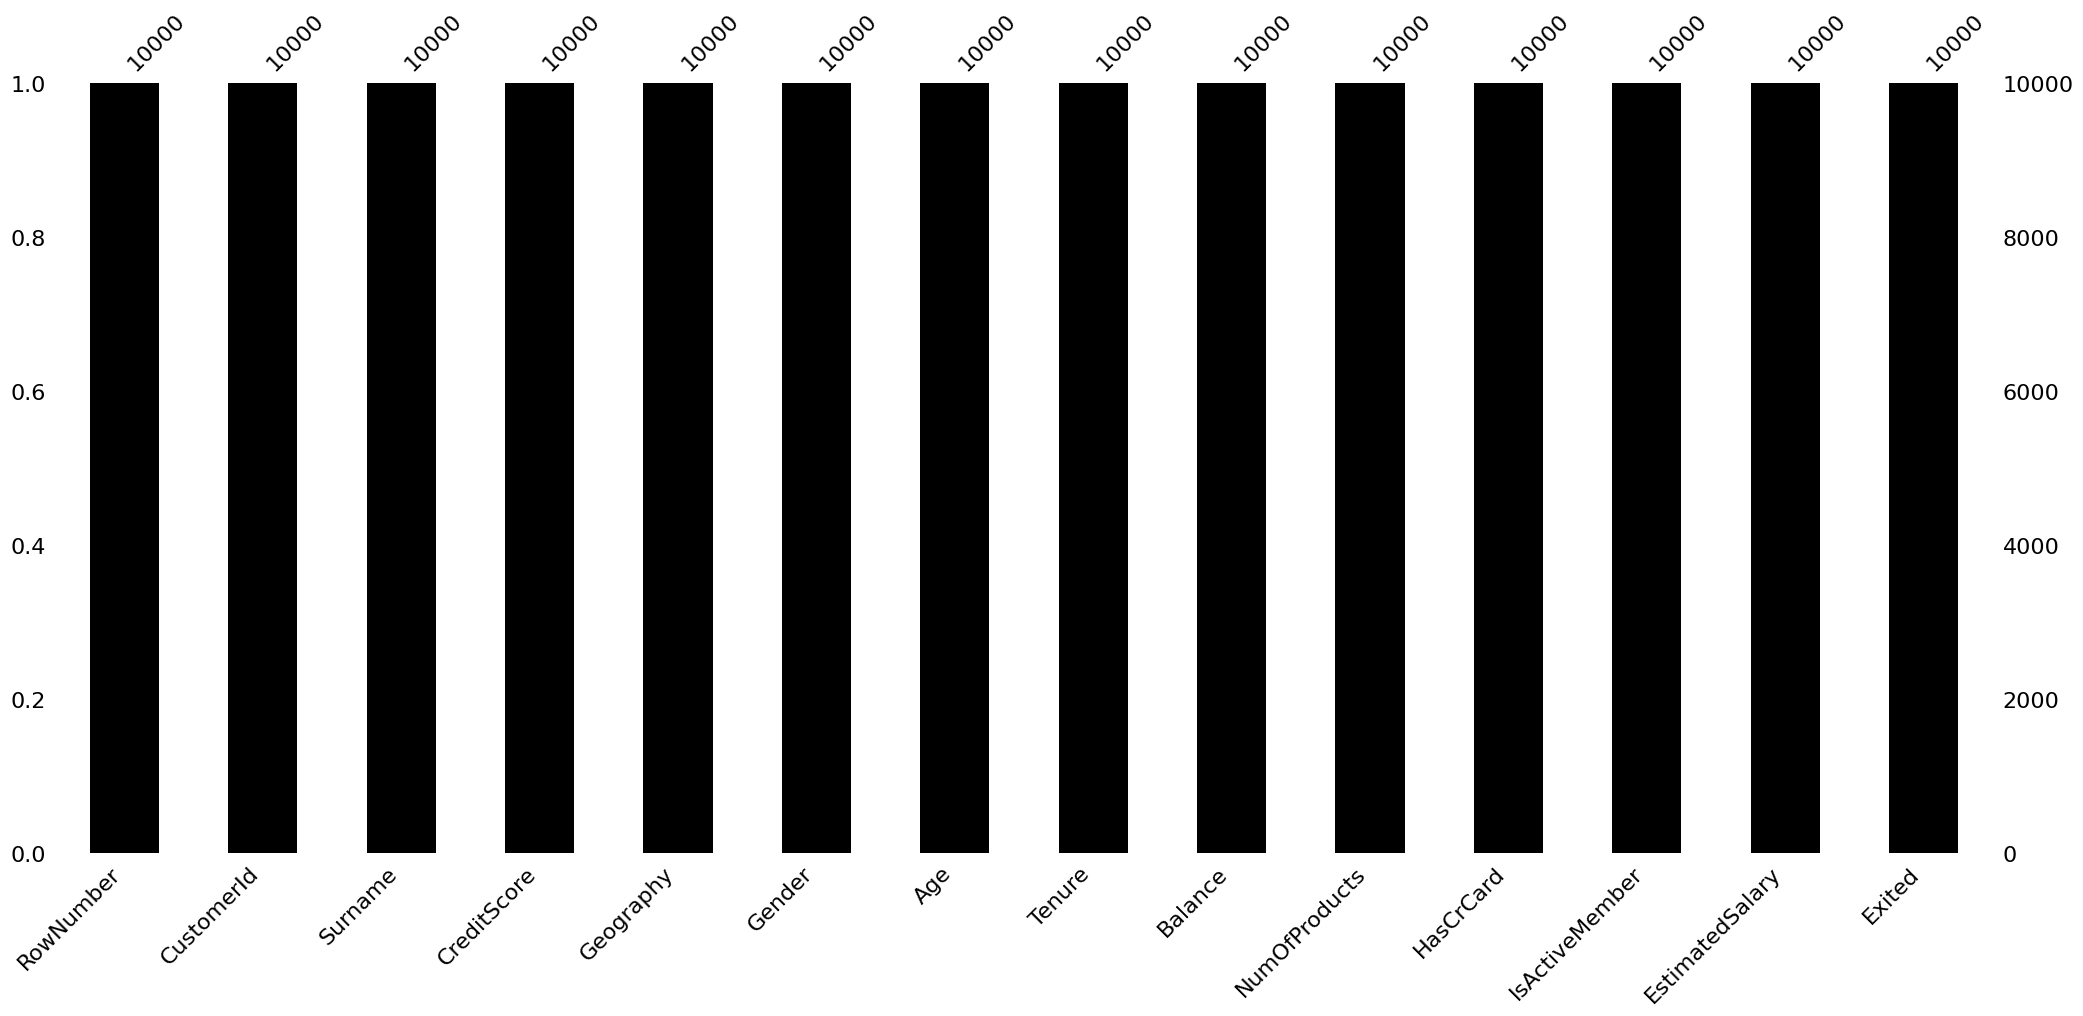

In [22]:
mns.bar(df,color = 'black')

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [25]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [26]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [28]:
df.drop(columns = [ 'RowNumber','CustomerId','Surname'],inplace = True)

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [40]:
X = df.drop(columns = 'Exited')
y = df['Exited']
X.shape

(10000, 11)

## Make sure to **split** then **scale** the data before trianing the data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [42]:
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (8000, 11)
X_test Shape: (2000, 11)
y_train Shape: (8000,)
y_test Shape: (2000,)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Importing Libraries**

In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### **Building Neural Network**

In [ ]:
model = Sequential()

model.add(Dense(3,activation = 'sigmoid',input_dim = 11)) # Hidden layer of 3 nodes(perceptrons) with total 11
model.add(Dense(1,activation='sigmoid')) # Output layer

c:\Python3.13\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Model Summary**

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

### **Model Compilation Stage**

In [54]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam')

In [55]:
model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4944
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4706
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4566
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4477
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4416
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4372
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4339
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4314
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4292
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4273


### **Weights & Biases**

In [ ]:
model.layers[0].get_weights() # Here 33 weights for 1st Input layer and 3 biases for the 3 node(perceptrons)

[array([[ 0.10820683,  0.02715451,  0.12947427],
        [-2.0327764 , -1.4596306 , -0.6103487 ],
        [-0.06546187,  0.0519883 ,  0.1873097 ],
        [-0.44569433, -0.00984628, -0.04782634],
        [-0.1584564 , -0.2550707 ,  1.2616175 ],
        [ 0.08194344, -0.2851726 ,  0.2715039 ],
        [ 0.41328776,  0.7060269 ,  0.5939814 ],
        [ 0.4089358 , -0.06843077, -0.21913181],
        [-0.29156002, -0.7022858 , -0.5390452 ],
        [-0.1997901 , -0.31106248,  0.23217349],
        [ 0.48267907,  0.3131491 ,  0.44396737]], dtype=float32),
 array([0.06090125, 0.07096102, 0.36556545], dtype=float32)]

In [60]:
model.layers[1].get_weights() # Here 3 weights for the next Hidden layer of 3 nodes and 1 bias for the last node

[array([[-0.83757466],
        [-1.4032209 ],
        [-1.2731181 ]], dtype=float32),
 array([0.22752622], dtype=float32)]

### **Prediction Stage**

In [61]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[0.17757109],
       [0.0799371 ],
       [0.28031224],
       ...,
       [0.3969492 ],
       [0.08255098],
       [0.21161206]], dtype=float32)

### Here the sigmoid gives the output as probabililty between 0 to 1 for each X_test

### So we need to decide according to some **threshold** by assuming or by **ROC-AUC Curve**

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [65]:
y_pred = np.where(y_log>0.5,1,0) # threshold of 0.50 probability

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.816

### -------------------------------------------------------**Optimizing Parameters and Nueral Nets**-------------------------------------------------------

In [95]:
model1 = Sequential()

model1.add(Dense(11,activation = 'relu',input_dim = 11)) # 1st layer of Hidden layer with 11 inputs
model1.add(Dense(11,activation = 'relu')) 
model1.add(Dense(1,activation='sigmoid')) # Output layer

c:\Python3.13\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model1.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics= ['accuracy'])

In [98]:
history = model1.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2) # it will also show accuracy score for separate 20% of validation and training for 60% of data

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6373 - loss: 0.6640 - val_accuracy: 0.7981 - val_loss: 0.4743
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7936 - loss: 0.4662 - val_accuracy: 0.8037 - val_loss: 0.4443
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7989 - loss: 0.4471 - val_accuracy: 0.8094 - val_loss: 0.4318
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8059 - loss: 0.4361 - val_accuracy: 0.8194 - val_loss: 0.4223
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8097 - loss: 0.4243 - val_accuracy: 0.8275 - val_loss: 0.4133
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4120 - val_accuracy: 0.8381 - val_loss: 0.4013
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8356 - loss: 0.3973 - val_accuracy: 0.8450 - val_loss: 0.3900
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8413 - loss: 0.3840 - val_accuracy: 0.8456

In [99]:
model1.layers[0].get_weights()

[array([[-0.26851773,  0.03458031,  0.22713959, -0.08561293,  0.44393697,
          0.05568068, -0.07369666, -0.07762923,  0.16144562, -0.37939698,
          0.02797271],
        [ 0.01177994, -0.4441128 , -0.02314136,  0.19003281, -0.11441573,
         -0.8055123 , -1.0236304 , -0.22815834,  0.0039309 , -0.15041137,
          0.6785476 ],
        [-0.10826975, -0.21016775, -0.44415087, -0.09959366,  0.06340923,
          0.03971871, -0.29152763, -0.12285842,  0.03747175,  0.2198504 ,
          0.13607924],
        [ 0.25598562,  0.22737214, -0.35382885,  0.6780323 , -0.41115314,
          0.01296069,  0.21505228, -0.37243122, -0.40675   , -0.6744062 ,
          0.02966283],
        [ 0.44902456,  1.3673613 ,  0.26814455,  1.0100257 , -0.12011223,
          0.13876386,  0.23042819, -0.4496227 , -0.7386507 ,  0.38657045,
          0.3590192 ],
        [ 0.32686353, -0.06369538, -0.26845232,  0.08968011, -0.2412919 ,
         -0.01904566,  0.2911706 , -0.14232928, -0.05209592, -0.1865712

In [100]:
model1.layers[1].get_weights()

[array([[ 0.60368174, -0.21589355, -0.00378647,  0.80168885,  0.583303  ,
         -0.16872658,  0.05797981,  0.38018692, -0.03842499,  0.21788408,
         -0.20073852],
        [-0.05828349, -0.0258171 , -1.7076086 , -0.09798714, -0.139309  ,
          0.87447435,  0.81231356, -0.16285467, -0.12494348, -0.96719384,
          0.8542217 ],
        [-0.33765128, -0.17039181,  0.08923558,  0.10855508, -0.0317455 ,
         -0.62797725, -0.39513123,  0.39764956,  0.08242089,  0.10957509,
         -0.09948765],
        [ 0.24126755,  0.18314864,  0.4636266 , -0.04761562,  0.0248544 ,
          0.40753666,  0.3852388 , -0.24291828, -0.44778422,  0.5170061 ,
          0.6301931 ],
        [ 0.16389737,  0.15394536, -0.00179671,  0.4033005 ,  0.61218137,
         -0.3938588 , -0.24073878,  0.40353963,  0.70793307,  0.10087197,
          0.41320005],
        [-0.698834  ,  0.17867345, -0.2818692 ,  0.53366584, -0.04986466,
         -0.01500837,  0.5378361 ,  0.17425954, -0.58201104, -0.9296855

In [101]:
model1.layers[2].get_weights()

[array([[ 1.3121127 ],
        [-0.5377002 ],
        [ 1.0244123 ],
        [-0.5296234 ],
        [-0.23762621],
        [ 1.3113698 ],
        [ 0.33410972],
        [-0.8308443 ],
        [-0.4228636 ],
        [ 0.94690967],
        [ 1.3013127 ]], dtype=float32),
 array([-0.27449742], dtype=float32)]

In [102]:
model1.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([[0.04678424],
       [0.00777419],
       [0.11018424],
       ...,
       [0.6738178 ],
       [0.05921107],
       [0.21859519]], dtype=float32)

In [103]:
y_log1 = model1.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [104]:
y_pred1 = np.where(y_log1>0.5,1,0) # threshold of 0.50 probability

In [105]:
accuracy_score(y_test,y_pred1)

0.8625

### **Graphs To Plot**

In [106]:
import matplotlib.pyplot as plt

In [108]:
history.history

{'accuracy': [0.6373437643051147,
  0.7935937643051147,
  0.7989062666893005,
  0.8059375286102295,
  0.8096874952316284,
  0.8214062452316284,
  0.8356249928474426,
  0.8412500023841858,
  0.844531238079071,
  0.848437488079071,
  0.8526562452316284,
  0.8556249737739563,
  0.856249988079071,
  0.8570312261581421,
  0.8587499856948853,
  0.8587499856948853,
  0.8590624928474426,
  0.8606250286102295,
  0.8618749976158142,
  0.8618749976158142,
  0.8604687452316284,
  0.862500011920929,
  0.8631250262260437,
  0.8623437285423279,
  0.8631250262260437,
  0.8615624904632568,
  0.8643749952316284,
  0.8623437285423279,
  0.8634374737739563,
  0.8639062643051147,
  0.8646875023841858,
  0.8654687404632568,
  0.8635937571525574,
  0.864062488079071,
  0.8651562333106995,
  0.8651562333106995,
  0.8653125166893005,
  0.864062488079071,
  0.8653125166893005,
  0.8643749952316284,
  0.8660937547683716,
  0.8643749952316284,
  0.8657812476158142,
  0.8673437237739563,
  0.8660937547683716,
  0.

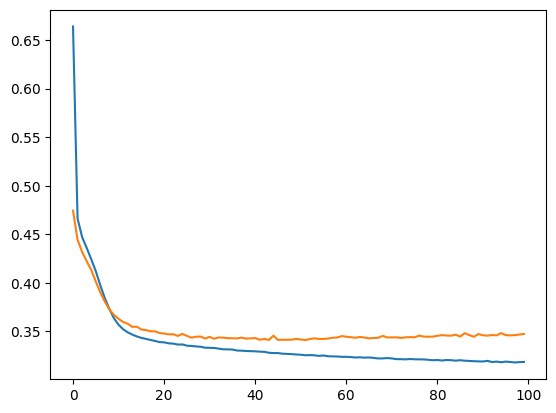

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

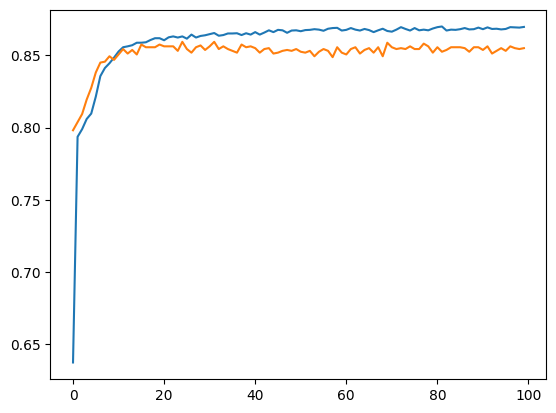

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])